In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [85]:
path = 'data\cars_train.csv'
df = pd.read_csv(path)


In [86]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389


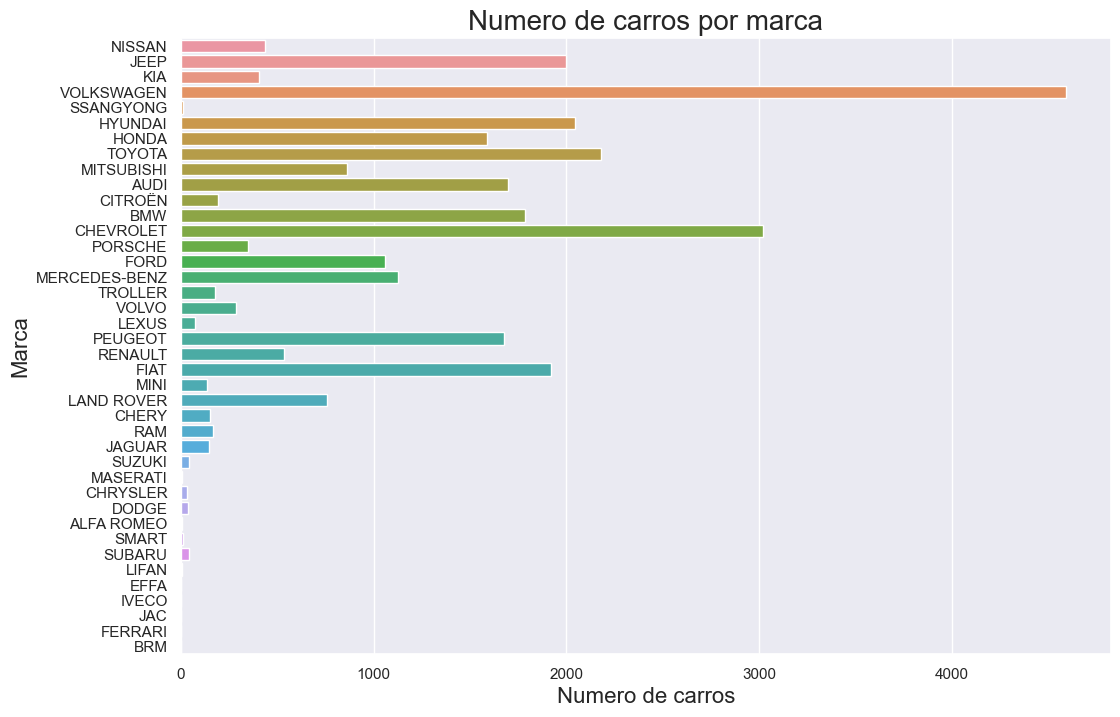

In [87]:
plt.figure(figsize = (12, 8))
sns.countplot(y = df.marca)
plt.title("Numero de carros por marca", fontsize = 20)
plt.ylabel("Marca", fontsize = 16)
plt.xlabel("Numero de carros", fontsize = 16)
plt.show()

Text(0.5, 0, 'Numero de carros')

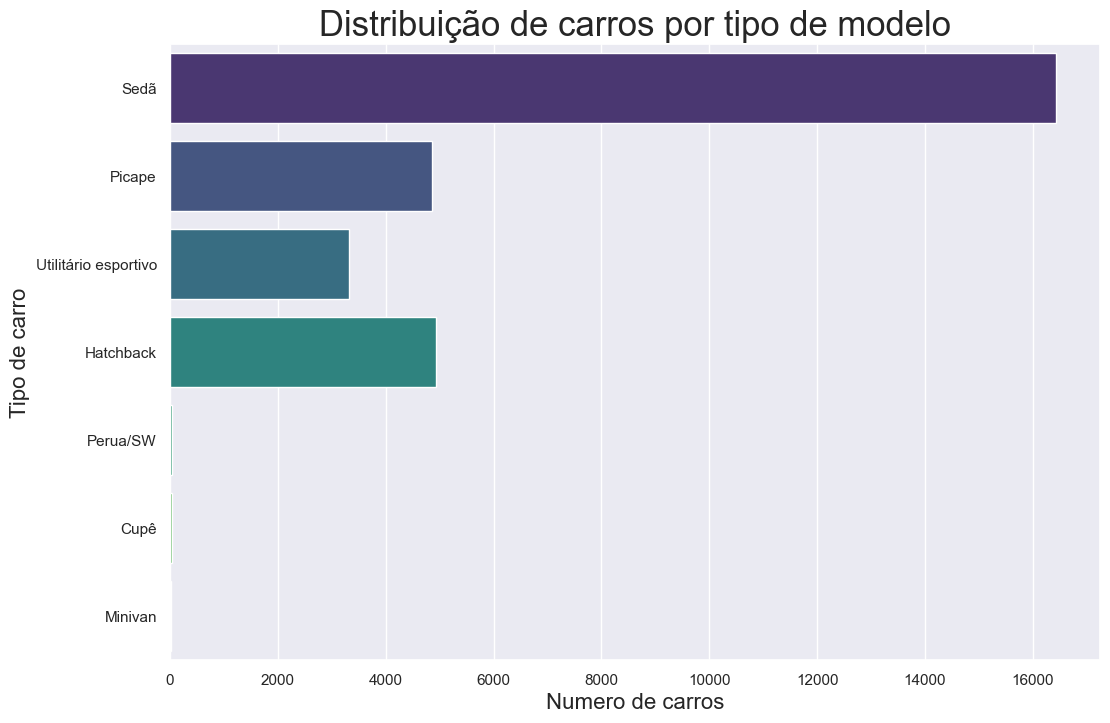

In [88]:
sns.set()
plt.figure(figsize=(12, 8))
graph = sns.countplot(y=df['tipo'], palette = 'viridis')
graph.set_title("Distribuição de carros por tipo de modelo", fontsize = 25)
graph.set_ylabel("Tipo de carro", fontsize = 16)
graph.set_xlabel("Numero de carros", fontsize = 16)

(0.0, 500000.0)

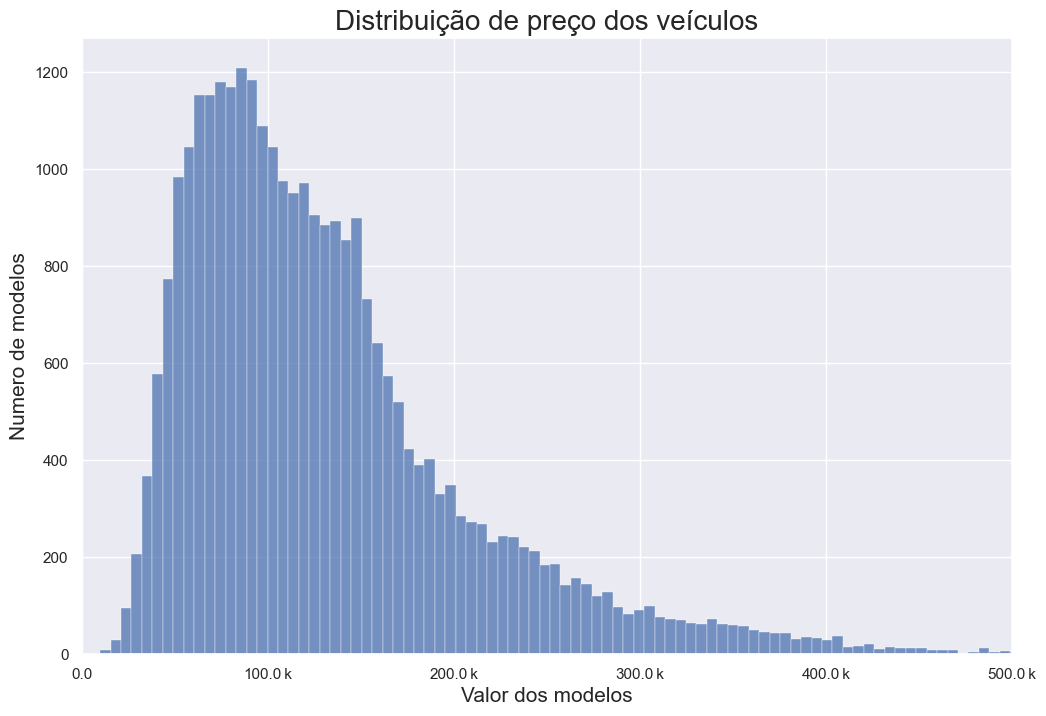

In [89]:
sns.set()
plt.figure(figsize=(12, 8))
graph = sns.histplot(data = df, x = 'preco')
graph.set_title("Distribuição de preço dos veículos", fontsize = 20)
graph.set_ylabel("Numero de modelos", fontsize = 15)
graph.set_xlabel("Valor dos modelos", fontsize = 15)
formatter = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
graph.xaxis.set_major_formatter(formatter)
graph.set_xlim(0,500000)

Text(0.5, 0, 'Numero de modelos')

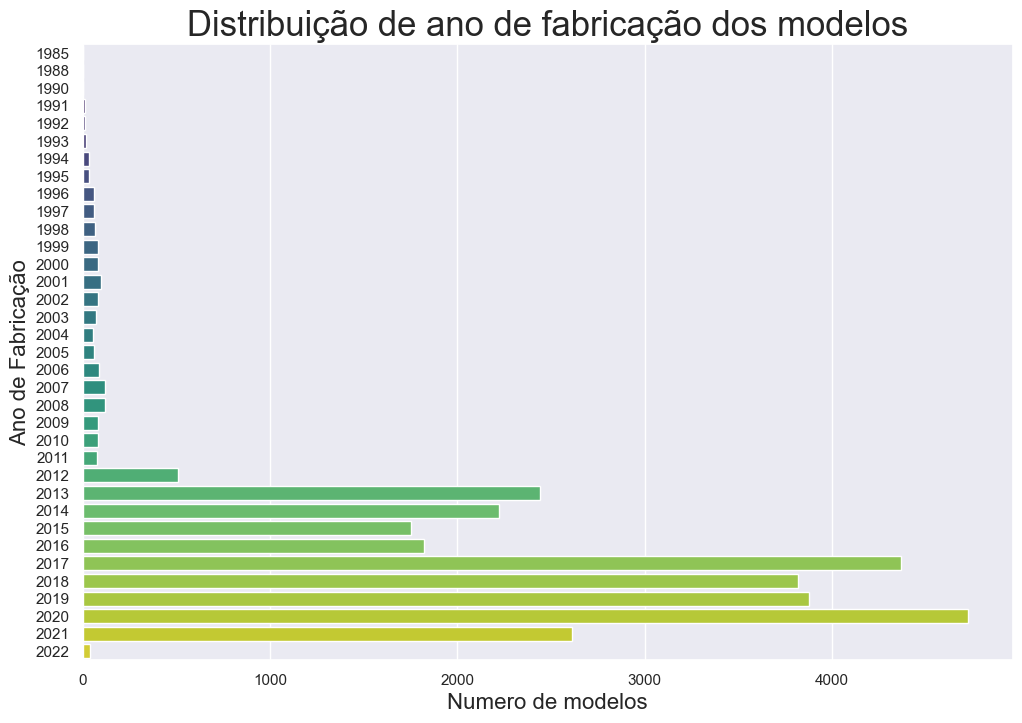

In [90]:
sns.set()
plt.figure(figsize=(12, 8))
graph = sns.countplot(y=df['ano_de_fabricacao'], palette = 'viridis')
graph.set_title("Distribuição de ano de fabricação dos modelos", fontsize = 25)
graph.set_ylabel("Ano de Fabricação", fontsize = 16)
graph.set_xlabel("Numero de modelos", fontsize = 16)

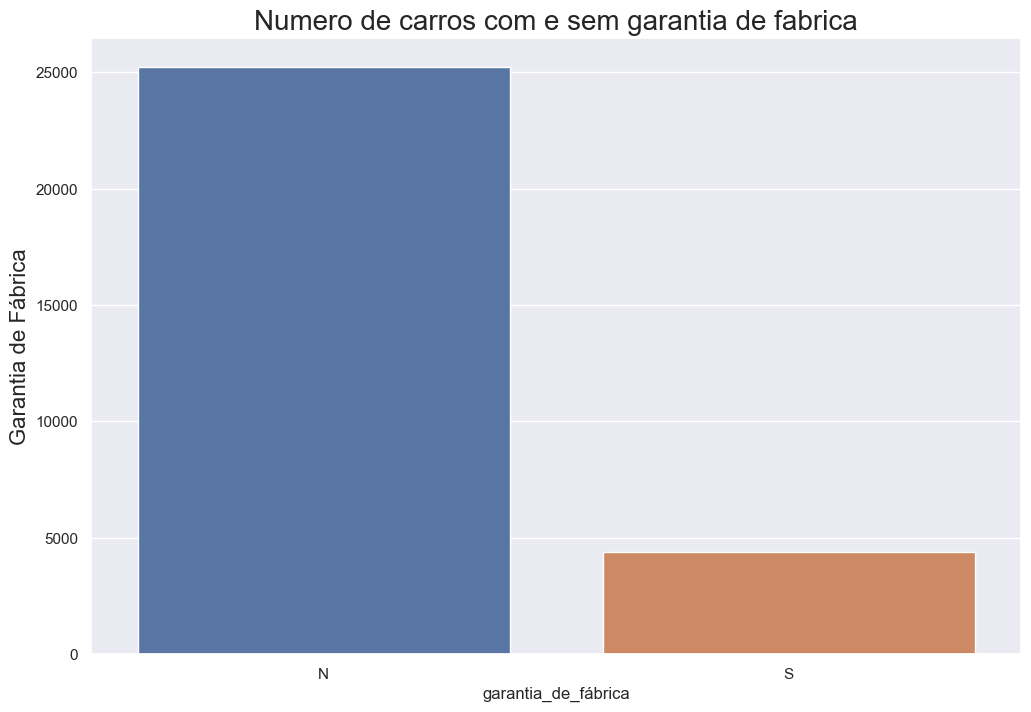

In [91]:
df.loc[df['garantia_de_fábrica'].notnull(),'garantia_de_fábrica'] = 'S'
df.loc[df['garantia_de_fábrica'].isnull(),'garantia_de_fábrica'] = 'N'

plt.figure(figsize = (12, 8))
sns.countplot(x= df.garantia_de_fábrica)
plt.title("Numero de carros com e sem garantia de fabrica", fontsize = 20)
plt.ylabel("Numero de carros", fontsize = 16)
plt.ylabel("Garantia de Fábrica", fontsize = 16)
plt.show()

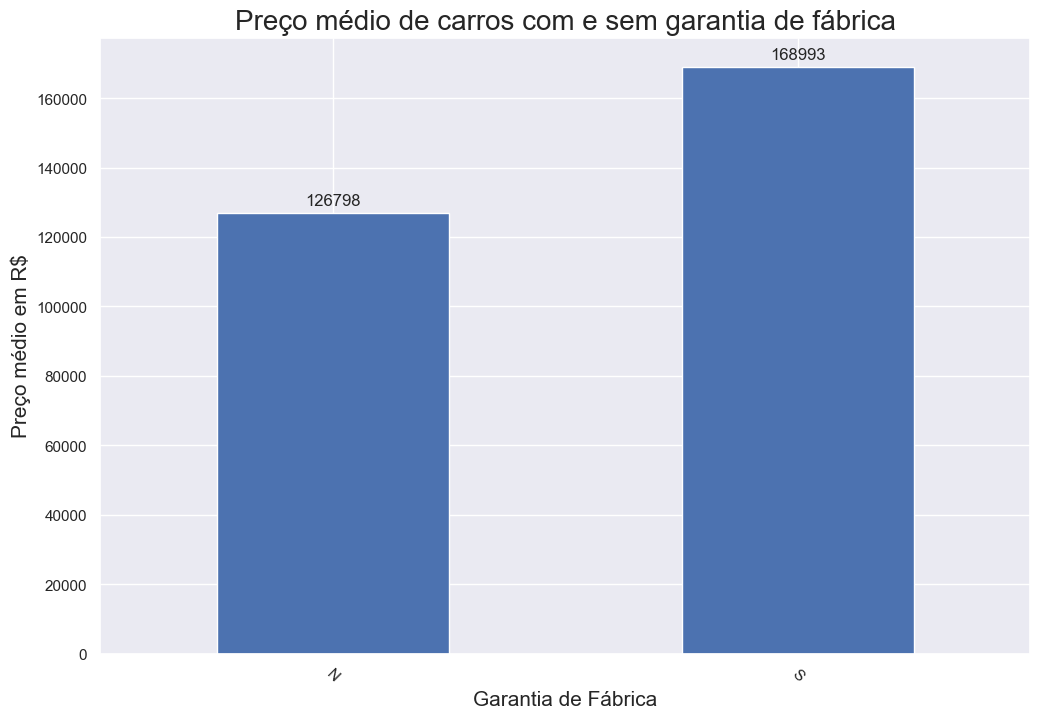

In [92]:
plt.figure(figsize = (12, 8))
plot = df.groupby('garantia_de_fábrica')['preco'].mean().plot(kind = 'bar')
plt.title("Preço médio de carros com e sem garantia de fábrica", fontsize = 20)
plt.xlabel('Garantia de Fábrica', fontsize = 15)
plt.ylabel('Preço médio em R$', fontsize = 15)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tick_params(axis='x', rotation=-45)
plt.show()

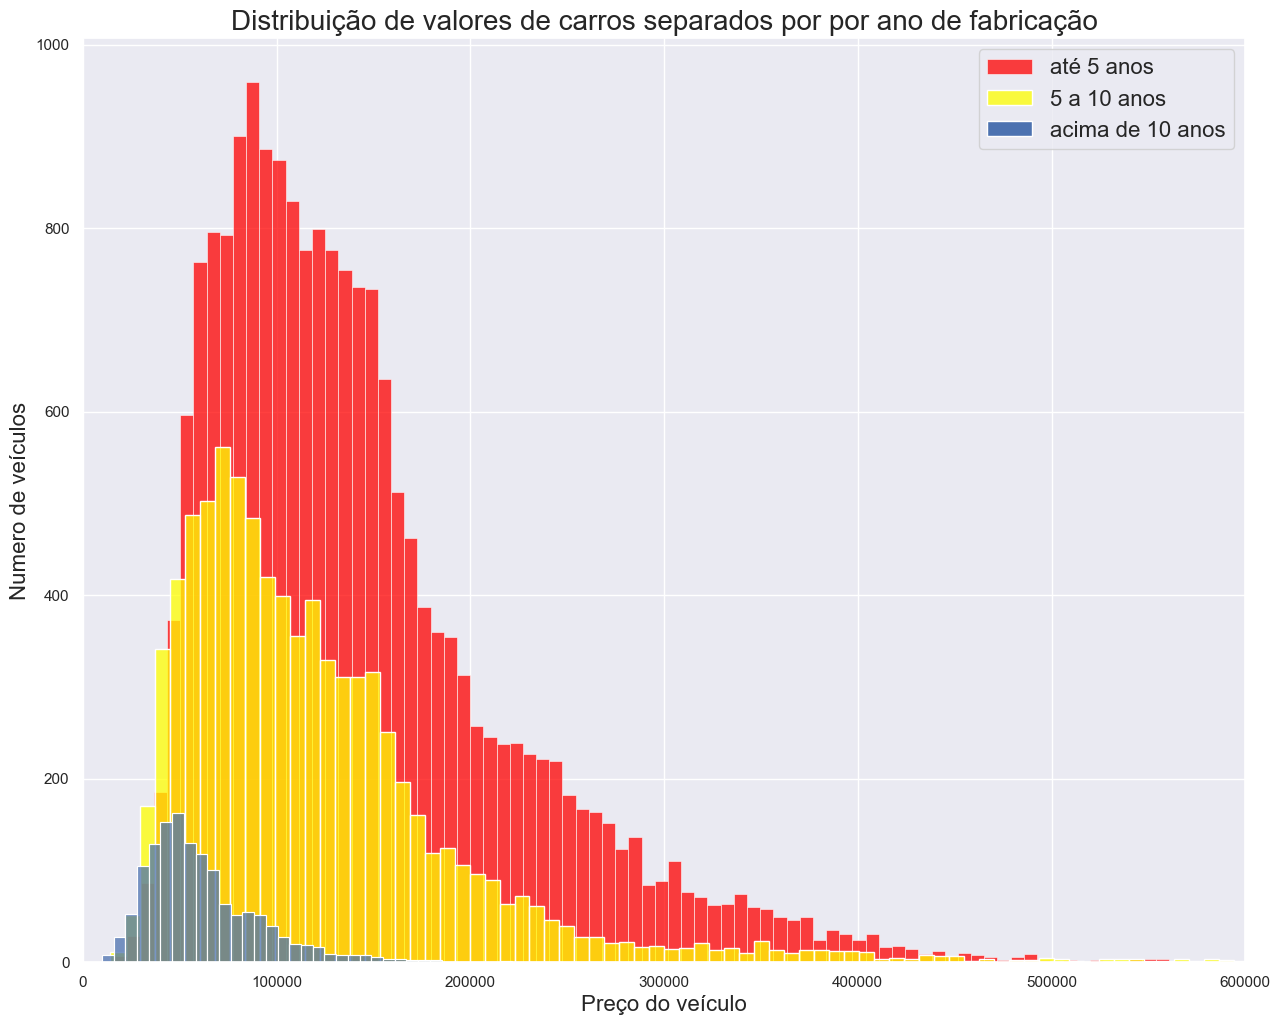

In [93]:
ate_cinco = df['ano_de_fabricacao'] > 2016
cinco_dez = (df['ano_de_fabricacao'] < 2017) & (df['ano_de_fabricacao'] > 2012)
dez_mais = df['ano_de_fabricacao'] < 2012

plt.figure(figsize=(15, 12))
sns.histplot(data = df[ate_cinco], x = 'preco', color='red').set_xlim(0,600000)
sns.histplot(data = df[cinco_dez], x = 'preco', color='yellow').set_xlim(0,600000)
sns.histplot(data = df[dez_mais], x = 'preco').set_xlim(0,600000)
plt.ylabel("Numero de veículos", fontsize = 16)
plt.xlabel("Preço do veículo", fontsize = 16)
plt.title("Distribuição de valores de carros separados por por ano de fabricação", fontsize = 20)
plt.legend(["até 5 anos", "5 a 10 anos", "acima de 10 anos"], loc ="upper right", fontsize=16)


In [94]:
anunciantes = df['anunciante'].unique()
print(anunciantes)


['Pessoa Física' 'Loja' 'Concessionária'
 'Acessórios e serviços para autos']


Preço - Tipo de vendedor

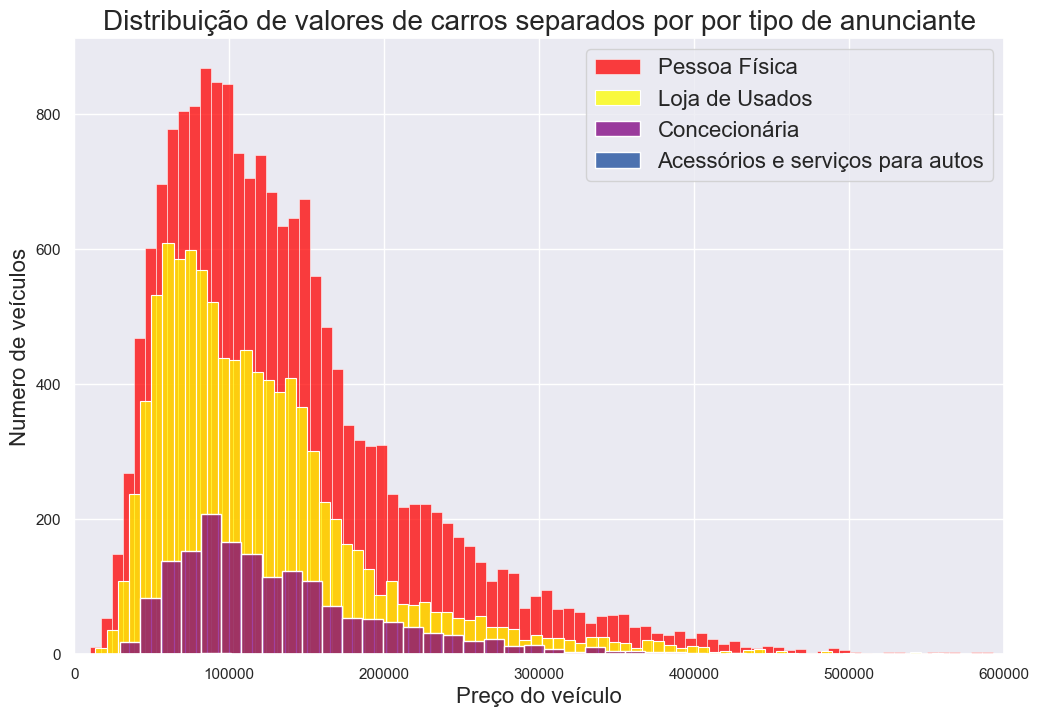

In [95]:
fisico = (df['anunciante'] == 'Pessoa Física')
loja = (df['anunciante'] == 'Loja')
conc = (df['anunciante'] == 'Concessionária')
acess = (df['anunciante'] == 'Acessórios e serviços para autos')

sns.set()
plt.figure(figsize=(12, 8))
sns.histplot(data = df[fisico], x = 'preco', color='red').set_xlim(0,600000)
sns.histplot(data = df[loja], x = 'preco', color='yellow').set_xlim(0,600000)
sns.histplot(data = df[conc], x = 'preco',color='purple').set_xlim(0,600000)
sns.histplot(data = df[acess], x = 'preco')
plt.ylabel("Numero de veículos", fontsize = 16)
plt.xlabel("Preço do veículo", fontsize = 16)
plt.title("Distribuição de valores de carros separados por por tipo de anunciante", fontsize = 20)
plt.legend(["Pessoa Física", "Loja de Usados", "Concecionária", 'Acessórios e serviços para autos'], loc ="upper right", fontsize=16)


ANO DE FABRICAÇÃO, TIPO DE VENDEDOR

In [96]:
anunciantes = df['cambio'].unique()
print(anunciantes)

['CVT' 'Automática' 'Manual' 'Automatizada' 'Semi-automática'
 'Automatizada DCT' 'Automática Sequencial']


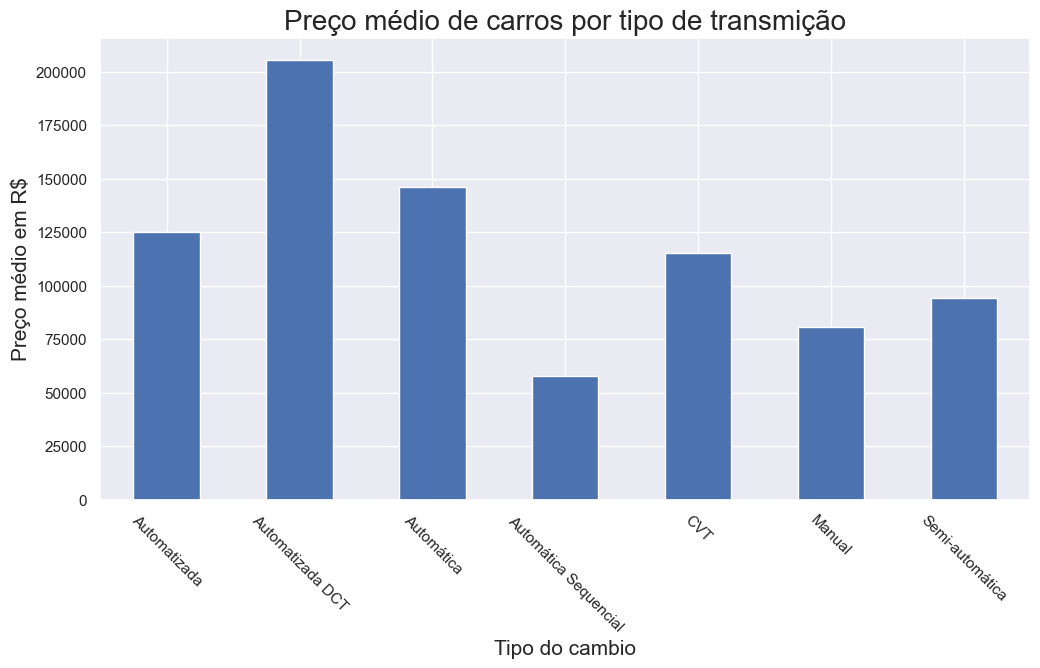

In [109]:
plt.figure(figsize = (12, 6))
df.groupby('cambio')['preco'].mean().plot(kind = 'bar')
plt.title("Preço médio de carros por tipo de transmição", fontsize = 20)
plt.xlabel('Tipo do cambio', fontsize = 15)
plt.ylabel('Preço médio em R$', fontsize = 15)
plt.tick_params(axis='x', rotation=-45)
plt.show()

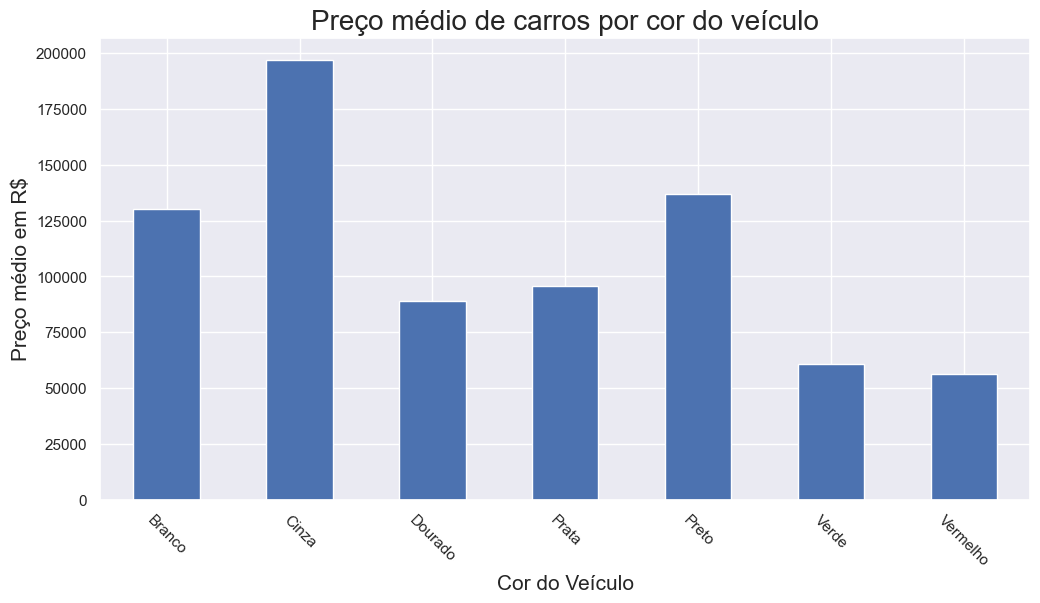

In [108]:
plt.figure(figsize = (12, 6))
df.groupby('cor')['preco'].mean().plot(kind = 'bar')
plt.title("Preço médio de carros por cor do veículo", fontsize = 20)
plt.xlabel('Cor do Veículo', fontsize = 15)
plt.ylabel('Preço médio em R$', fontsize = 15)
plt.tick_params(axis='x', rotation=-45)
plt.show()

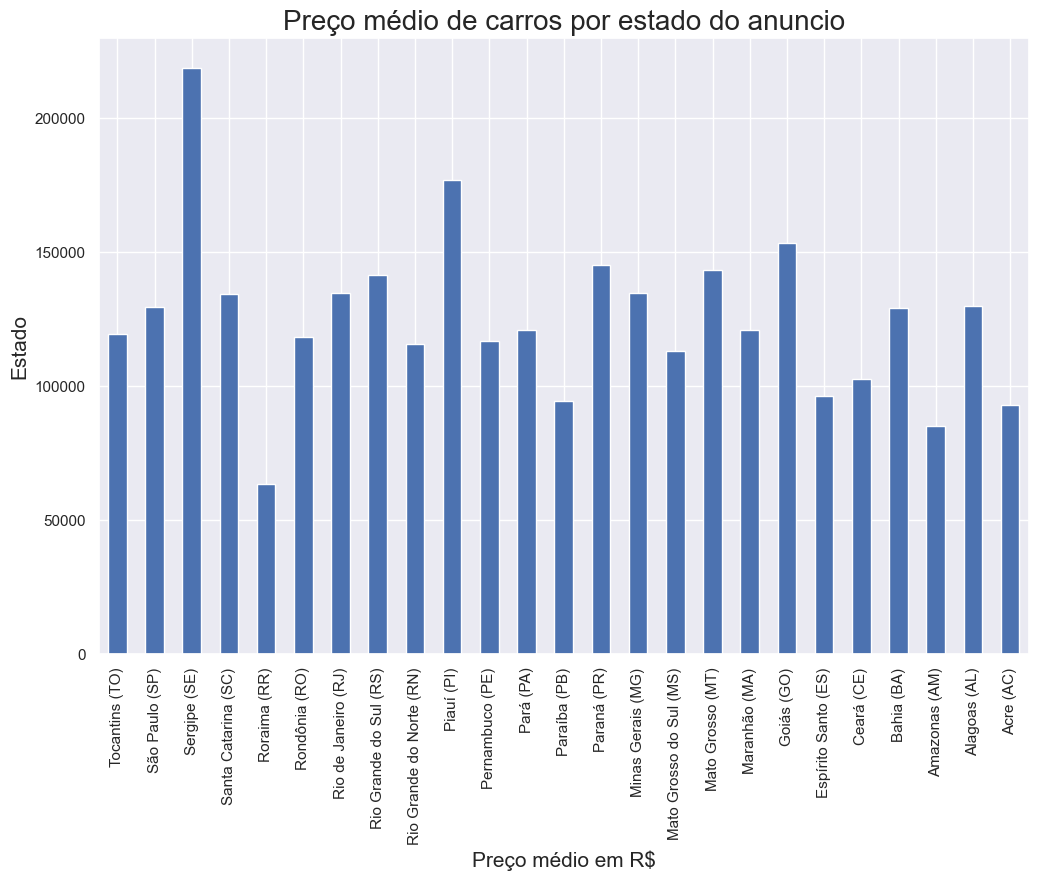

In [99]:
plt.figure(figsize = (12, 8))
graph = df.groupby('estado_vendedor')['preco'].mean().plot(kind = 'bar')
graph.invert_xaxis()
plt.title("Preço médio de carros por estado do anuncio", fontsize = 20)
plt.ylabel('Estado', fontsize = 15)
plt.xlabel('Preço médio em R$', fontsize = 15)
plt.show()

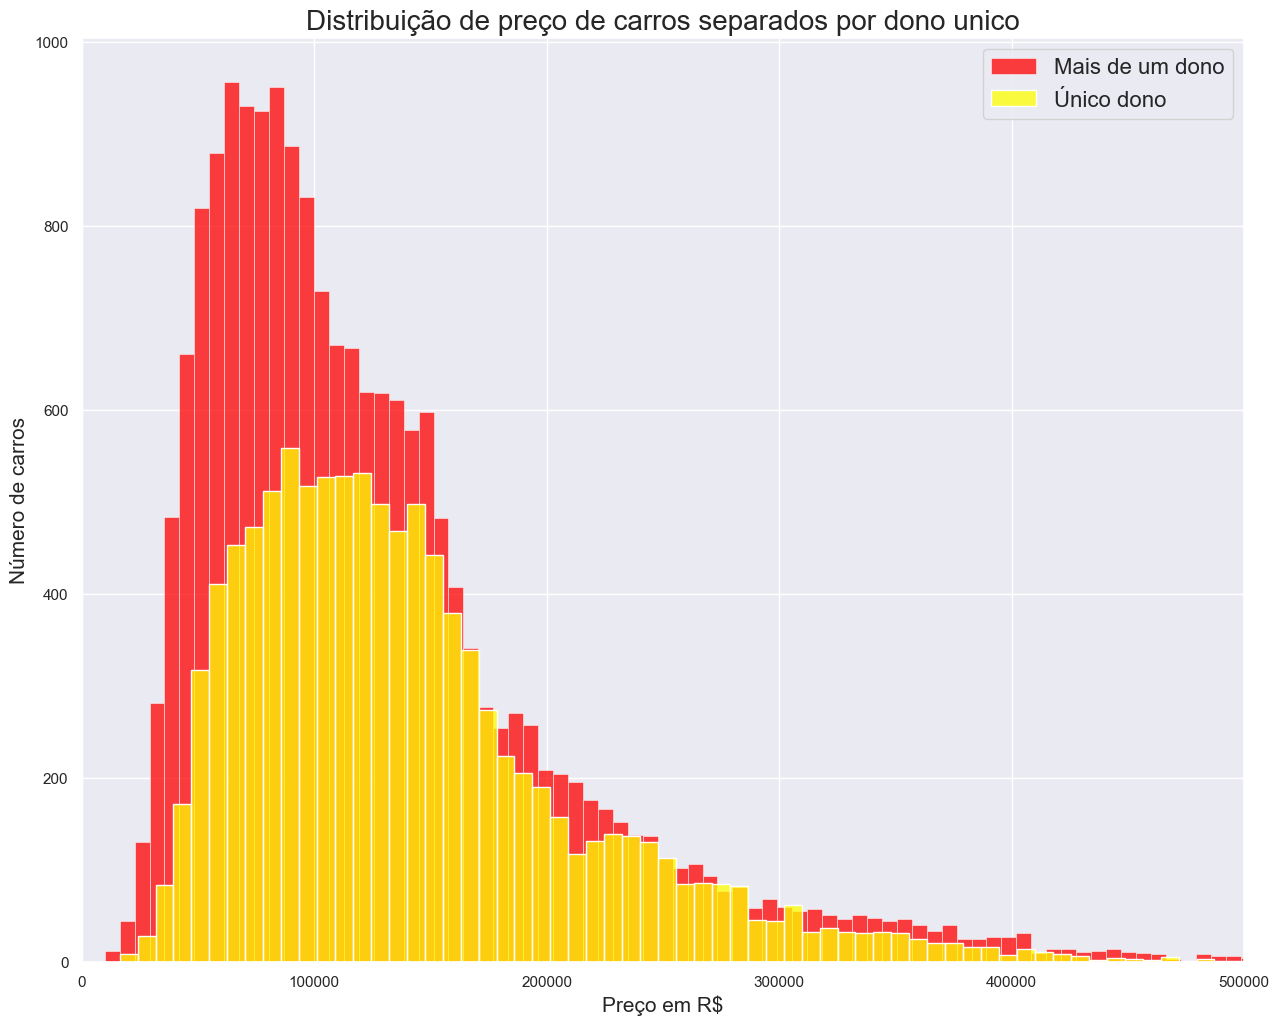

In [105]:
n_unicos = df['veiculo_único_dono'].isnull()
unicos = (df['veiculo_único_dono'] == 'Único dono')

plt.figure(figsize=(15, 12))
sns.histplot(data = df[n_unicos], x = 'preco', color='red').set_xlim(0,500000)
sns.histplot(data = df[unicos], x = 'preco', color='yellow').set_xlim(0,500000)
plt.title("Distribuição de preço de carros separados por dono unico", fontsize = 20)
plt.xlabel('Preço em R$', fontsize = 15)
plt.ylabel('Número de carros', fontsize = 15)
plt.legend(["Mais de um dono", "Único dono"], loc ="upper right", fontsize=16)


# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

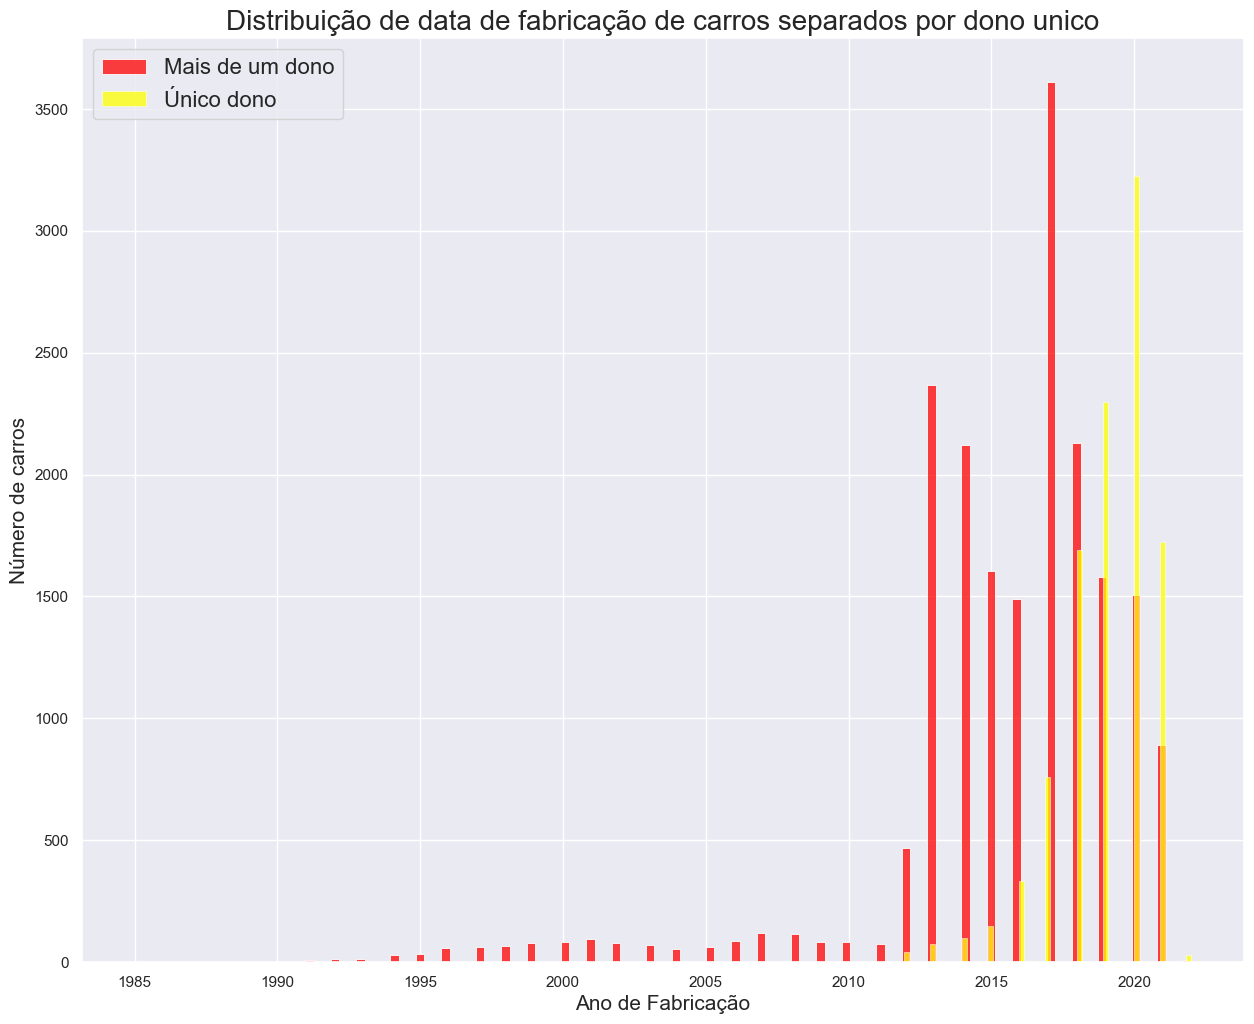

In [107]:
n_unicos = df['veiculo_único_dono'].isnull()
unicos = (df['veiculo_único_dono'] == 'Único dono')

plt.figure(figsize=(15, 12))
sns.histplot(data = df[n_unicos], x = 'ano_de_fabricacao', color='red')
sns.histplot(data = df[unicos], x = 'ano_de_fabricacao', color='yellow')
plt.title("Distribuição de data de fabricação de carros separados por dono unico", fontsize = 20)
plt.xlabel('Ano de Fabricação', fontsize = 15)
plt.ylabel('Número de carros', fontsize = 15)
plt.legend(["Mais de um dono", "Único dono"], loc ="upper left", fontsize=16)


<Figure size 1400x600 with 0 Axes>

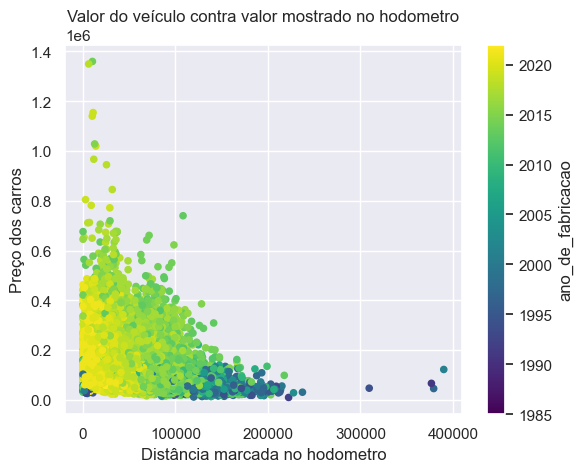

In [110]:
plt.figure(figsize=(14, 6))

df.plot.scatter(x='hodometro', y='preco', c='ano_de_fabricacao', colormap='viridis')
plt.title("Valor do veículo contra valor mostrado no hodometro")
plt.xlabel("Distância marcada no hodometro")
plt.ylabel("Preço dos carros")

plt.show()